In [70]:
import pandas as pd

In [71]:
pd.__version__

'1.4.4'

In [72]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [73]:
data=pd.read_excel(r'C:\Users\Dell\Desktop\Model\Data.xlsx')
data

,Location,Building Size,Ambience,Menu,Chef,Kitchen Size,Marketing,Staff - Level,Security,Government Permission,TOTAL
0,Vijayawada,Small,31250,285320,18750,100998,11499,13050,Yes,Yes,460867
1,Guntur,Small,31250,285320,90540,150390,45999,40599,Yes,Yes,644098
2,Guntur,Small,60430,1200499,90540,100998,11499,13050,Yes,Yes,1477016
3,Guntur,Large,1000990,2300890,1500430,300550,45999,40599,Yes,Yes,5189458
4,Vijayawada,Small,31250,285320,1500430,300550,140099,230150,Yes,Yes,2487799
...,...,...,...,...,...,...,...,...,...,...,...
227,Guntur,Medium,31250,285320,18750,100998,11499,40599,Yes,Yes,488416
228,Vishakapatnam,Small,70000,400000,30000,150000,30000,15000,Yes,Yes,695000
229,Guntur,Large,31250,285320,18750,100998,11499,13050,Yes,Yes,460867
230,Vijayawada,Small,60430,1200499,1500430,300550,140099,230150,Yes,Yes,3432158


In [74]:
data['Building Size'].unique()

array(['Small', 'Large', 'Medium'], dtype=object)

In [75]:
data.shape

(232, 11)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Location               232 non-null    object
 1   Building Size          232 non-null    object
 2   Ambience               232 non-null    int64 
 3   Menu                   232 non-null    int64 
 4   Chef                   232 non-null    int64 
 5   Kitchen Size           232 non-null    int64 
 6   Marketing              232 non-null    int64 
 7   Staff - Level          232 non-null    int64 
 8   Security               232 non-null    object
 9   Government Permission  232 non-null    object
 10  TOTAL                  232 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 20.1+ KB


In [77]:
data['Menu ']

0       285320
1       285320
2      1200499
3      2300890
4       285320
        ...   
227     285320
228     400000
229     285320
230    1200499
231    1800000
Name: Menu , Length: 232, dtype: int64

In [78]:
data.describe()

,Ambience,Menu,Chef,Kitchen Size,Marketing,Staff - Level,TOTAL
count,2.320000e+02,2.320000e+02,2.320000e+02,232.000000,232.000000,232.000000,2.320000e+02
mean,3.543902e+05,1.289725e+06,5.104653e+05,205590.094828,69544.633621,93150.439655,2.522866e+06
std,5.299216e+05,9.424652e+05,7.617752e+05,110302.623647,62855.553983,116596.834926,2.080704e+06
min,3.125000e+04,2.853200e+05,1.875000e+04,100998.000000,11499.000000,13050.000000,4.608670e+05
25%,3.125000e+04,2.853200e+05,1.875000e+04,150000.000000,30000.000000,15000.000000,7.062500e+05
50%,6.043000e+04,1.200499e+06,9.054000e+04,150390.000000,45999.000000,40599.000000,2.022268e+06
75%,1.000990e+06,2.300890e+06,1.500430e+06,300550.000000,140099.000000,230150.000000,3.629408e+06
max,1.500000e+06,3.000000e+06,2.200000e+06,500000.000000,250000.000000,445000.000000,7.895000e+06


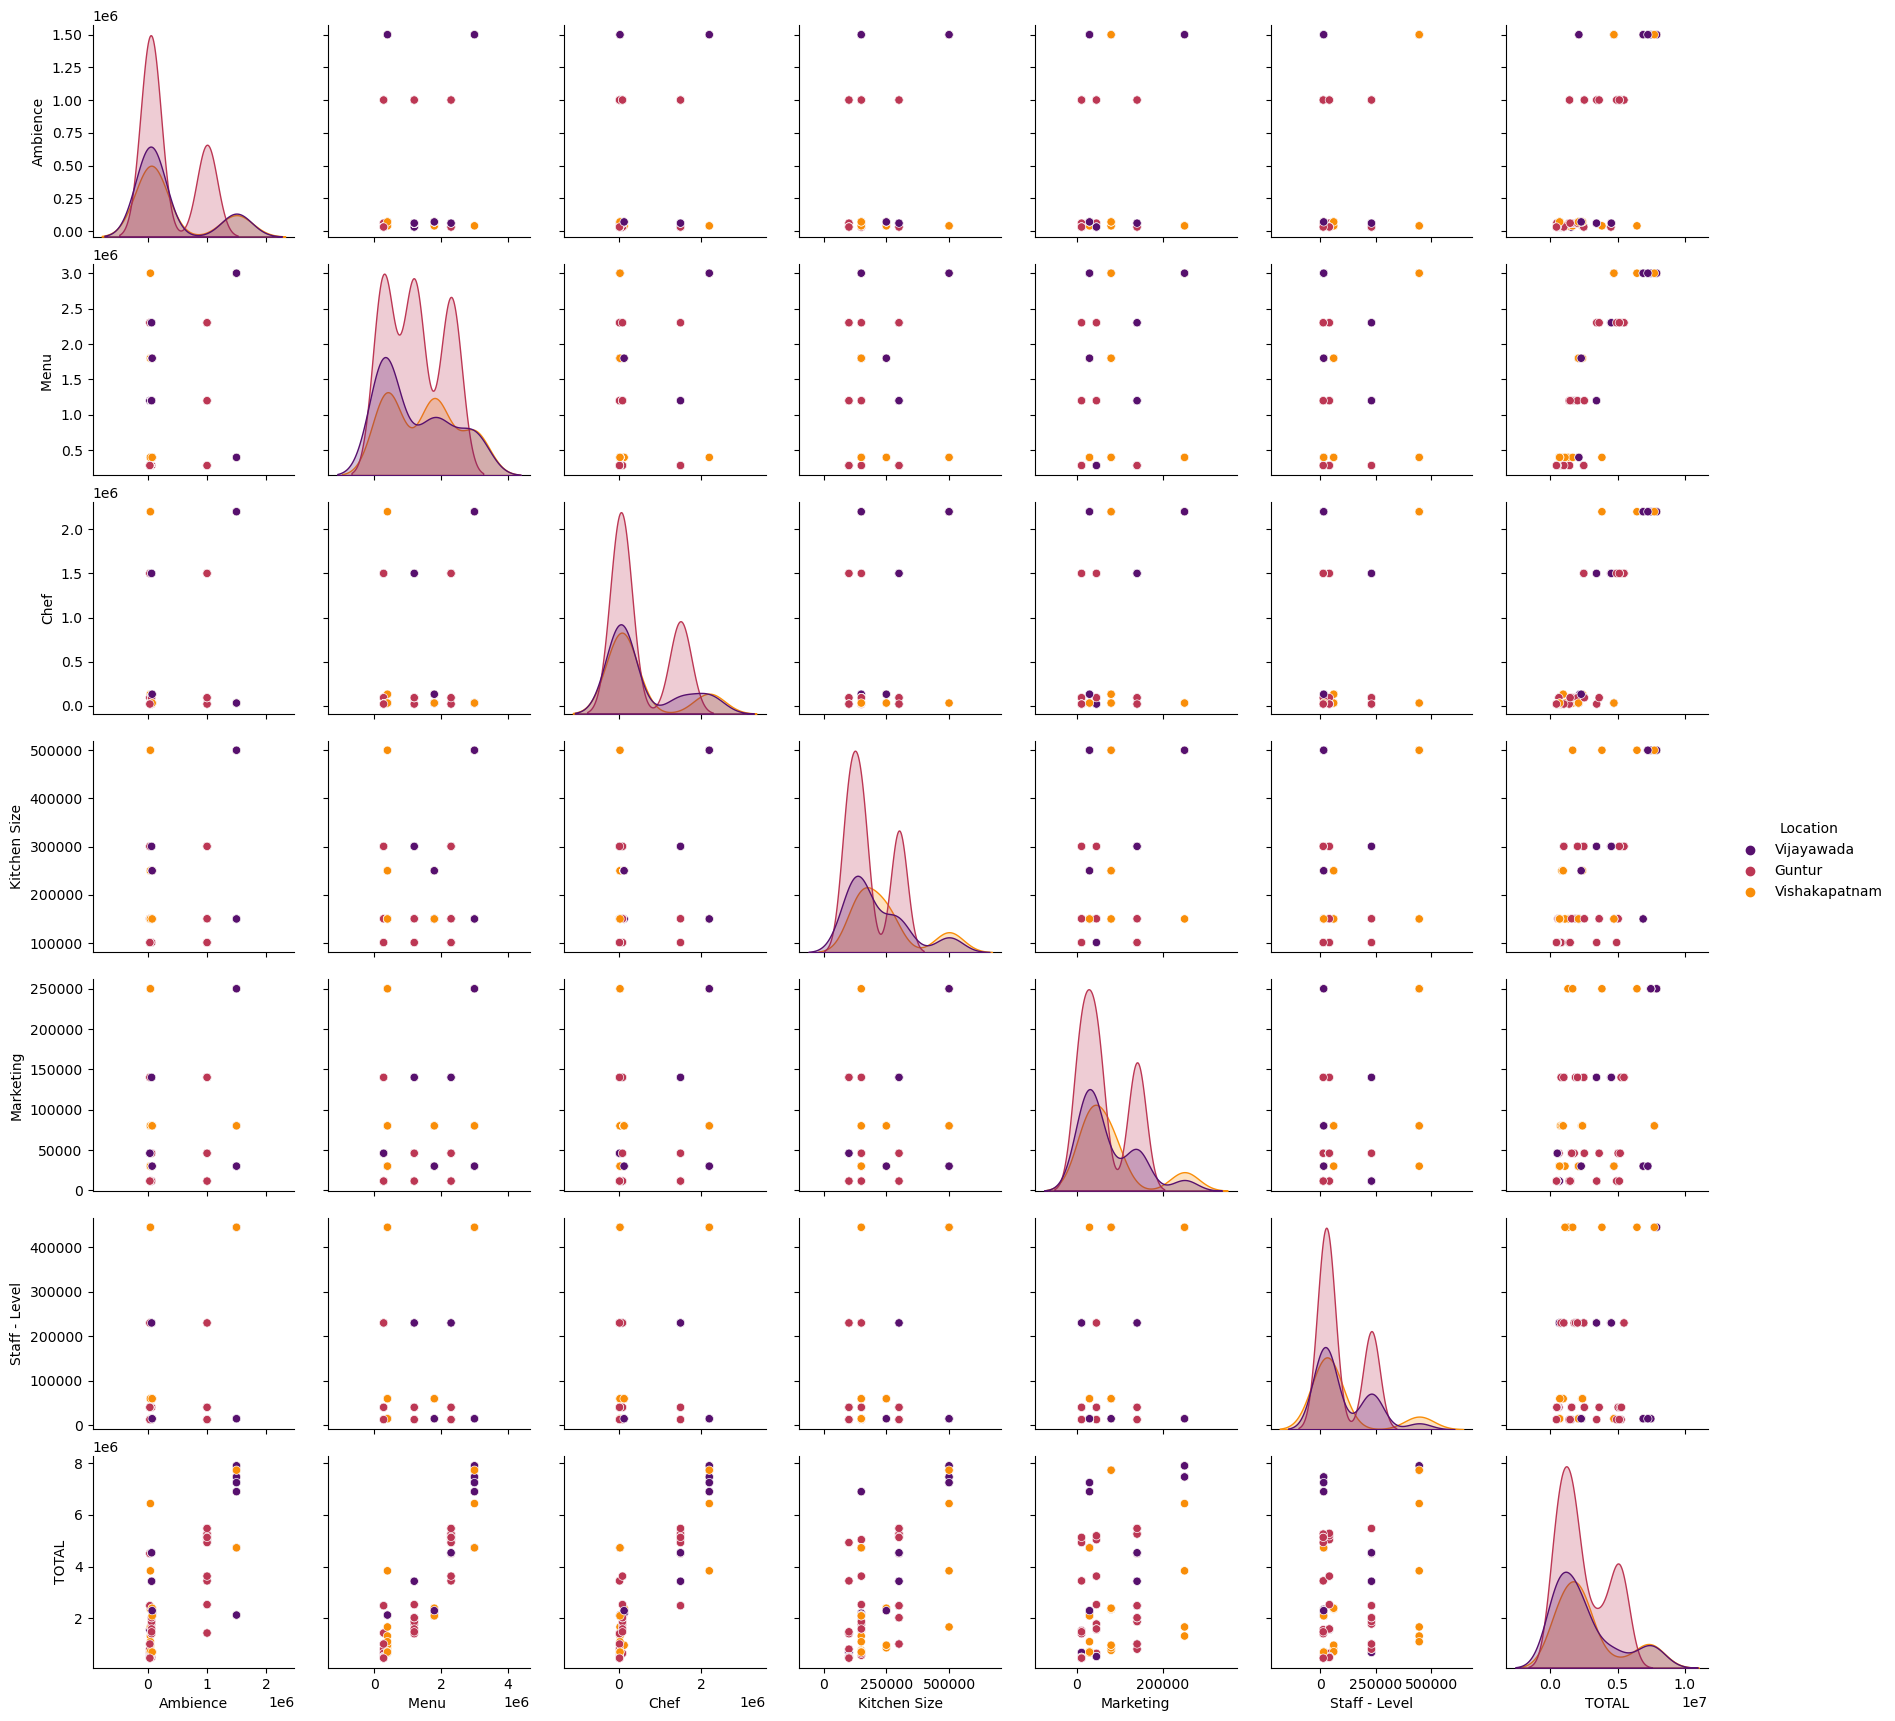

In [79]:
#shade=["#835656","#baa0a0","#ffc7c8","#a9a799","#65634a"]
ax=sns.pairplot(data, hue= "Location",palette='inferno')
plt.show()

In [80]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'Building Size', 'Security', 'Government Permission']


In [81]:
label_data=data.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col]=label_encoder.fit_transform(label_data[col])
label_data

,Location,Building Size,Ambience,Menu,Chef,Kitchen Size,Marketing,Staff - Level,Security,Government Permission,TOTAL
0,1,2,31250,285320,18750,100998,11499,13050,0,0,460867
1,0,2,31250,285320,90540,150390,45999,40599,0,0,644098
2,0,2,60430,1200499,90540,100998,11499,13050,0,0,1477016
3,0,0,1000990,2300890,1500430,300550,45999,40599,0,0,5189458
4,1,2,31250,285320,1500430,300550,140099,230150,0,0,2487799
...,...,...,...,...,...,...,...,...,...,...,...
227,0,1,31250,285320,18750,100998,11499,40599,0,0,488416
228,2,2,70000,400000,30000,150000,30000,15000,0,0,695000
229,0,0,31250,285320,18750,100998,11499,13050,0,0,460867
230,1,2,60430,1200499,1500430,300550,140099,230150,0,0,3432158


In [82]:
data

,Location,Building Size,Ambience,Menu,Chef,Kitchen Size,Marketing,Staff - Level,Security,Government Permission,TOTAL
0,Vijayawada,Small,31250,285320,18750,100998,11499,13050,Yes,Yes,460867
1,Guntur,Small,31250,285320,90540,150390,45999,40599,Yes,Yes,644098
2,Guntur,Small,60430,1200499,90540,100998,11499,13050,Yes,Yes,1477016
3,Guntur,Large,1000990,2300890,1500430,300550,45999,40599,Yes,Yes,5189458
4,Vijayawada,Small,31250,285320,1500430,300550,140099,230150,Yes,Yes,2487799
...,...,...,...,...,...,...,...,...,...,...,...
227,Guntur,Medium,31250,285320,18750,100998,11499,40599,Yes,Yes,488416
228,Vishakapatnam,Small,70000,400000,30000,150000,30000,15000,Yes,Yes,695000
229,Guntur,Large,31250,285320,18750,100998,11499,13050,Yes,Yes,460867
230,Vijayawada,Small,60430,1200499,1500430,300550,140099,230150,Yes,Yes,3432158


In [83]:
data.describe()

,Ambience,Menu,Chef,Kitchen Size,Marketing,Staff - Level,TOTAL
count,2.320000e+02,2.320000e+02,2.320000e+02,232.000000,232.000000,232.000000,2.320000e+02
mean,3.543902e+05,1.289725e+06,5.104653e+05,205590.094828,69544.633621,93150.439655,2.522866e+06
std,5.299216e+05,9.424652e+05,7.617752e+05,110302.623647,62855.553983,116596.834926,2.080704e+06
min,3.125000e+04,2.853200e+05,1.875000e+04,100998.000000,11499.000000,13050.000000,4.608670e+05
25%,3.125000e+04,2.853200e+05,1.875000e+04,150000.000000,30000.000000,15000.000000,7.062500e+05
50%,6.043000e+04,1.200499e+06,9.054000e+04,150390.000000,45999.000000,40599.000000,2.022268e+06
75%,1.000990e+06,2.300890e+06,1.500430e+06,300550.000000,140099.000000,230150.000000,3.629408e+06
max,1.500000e+06,3.000000e+06,2.200000e+06,500000.000000,250000.000000,445000.000000,7.895000e+06


In [84]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

<AxesSubplot:>

In [ ]:
plt.show()

In [ ]:
X= label_data.drop(["Security","Government Permission","TOTAL"],axis =1)
y= label_data["TOTAL"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [ ]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

In [ ]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

In [68]:
pred=pipeline_lr.predict(X_test)
pred

array([4725000.,  806567.,  710000., 4532549., 2022268., 3835000.,
       5189458., 1588457., 5127409., 2360000.,  860000.,  665000.,
       1559277.,  490047., 1872108., 1477016.,  695000.,  644098.,
       2390000., 1665000.,  695000., 1006119.,  644098., 2195000.,
       7245000., 2125000.,  695000., 5473109., 1315000., 2295000.,
        522916.,  665000., 2095000., 1588457., 3446177.,  760000.,
       2195000.,  460867., 2095000., 2095000.,  460867., 2125000.,
       7895000.,  488416., 3432158., 1588457.,  677967.,  677967.,
       1588457., 2022268., 2345000., 1430607., 2022268., 1006119.,
       7725000., 4503369., 7895000.,  572308.])

In [69]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 1.0
Adjusted R^2: 1.0
MAE: 8.510361457693166e-10
MSE: 1.2524404406298068e-18
RMSE: 1.1191248547994128e-09


In [ ]:
import pickle
with open('Start_Capital_Tally.pkl','wb') as file:
    pickle.dump(pred,file)